In [58]:
#import necassary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#load the data into a pandas dataframe,
hour = pd.read_csv('hour.csv')
hour.shape

(17379, 17)

# First, we start with the data analysis

In [60]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [61]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [62]:
# remove duplicate rows
hour = hour.drop_duplicates(keep='first')

In [63]:
# 731 rows, 14 columns
hour.shape

(17379, 17)

In [64]:
#show some important calculations on the dataset
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [65]:
# sort the data w.r.t. cnt, check for outliers
hour_sort = hour.sort_values(by='cnt',ascending=False).head()
hour_sort.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967


In [66]:
#returns the index of the highest and lowest variables in the column, with the associated values from the other columns
def min_max_values(col):
    top = hour[col].idxmax()
    top_obs= pd.DataFrame(hour.loc[top])
    
    bottom = hour[col].idxmin()
    bottom_obs= pd.DataFrame(hour.loc[bottom])
    
    min_max_obs = pd.concat([top_obs,bottom_obs],axis=1)
    
    return min_max_obs

In [67]:
#returns min_max of cnt, first column is the max, this returns the id of the record
min_max_values('cnt')

,14773,4
instant,14774,5
dteday,2012-09-12,2011-01-01
season,3,1
yr,1,0
mnth,9,1
hr,18,4
holiday,0,0
weekday,3,6
workingday,1,0
weathersit,1,1


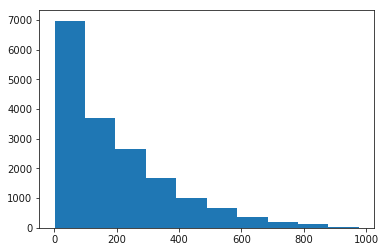

In [68]:
#histogram representing cnt
num_bins = 10
plt.hist (hour['cnt'],num_bins)
plt.savefig('hist1.png')

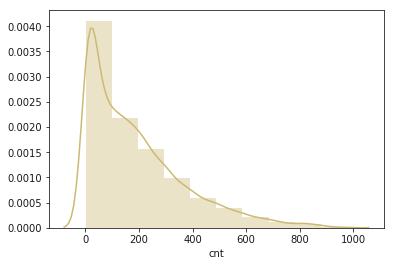

In [69]:
#histogram with kernel density estimate and the fit line
sns.set_color_codes()
s1 = sns.distplot(hour['cnt'],num_bins,color='y')
#s1.saveplot("output.png")

In [70]:
season_dist= hour.groupby('mnth').size()
season_dist

mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
dtype: int64

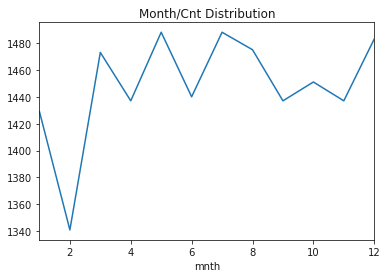

In [71]:
#distribution of mnth w.r.t cnt
season_dist.plot(title='Month/Cnt Distribution')
#plt.savefig('dist1.png')

In [72]:
#select numerical values
hour_num = hour.select_dtypes(include=['float64','int64'])
hour_num.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79d0328690>,
      dtype=object)

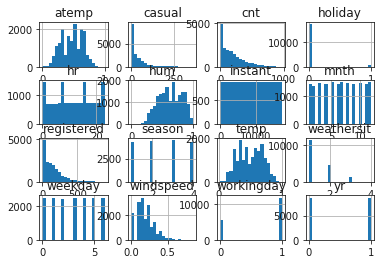

In [73]:
#histograms representing other attributes
hour_num.hist(bins=20)

In [74]:
#correlation analysis, 
hour_corr= hour_num.corr()['cnt'][:-1]

The temp, atem & hr are the most +vely correlating features, the hum is the most negatively 

In [75]:
#sort the correlations in descending order,
hour_corr.sort_values(ascending=False)

registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

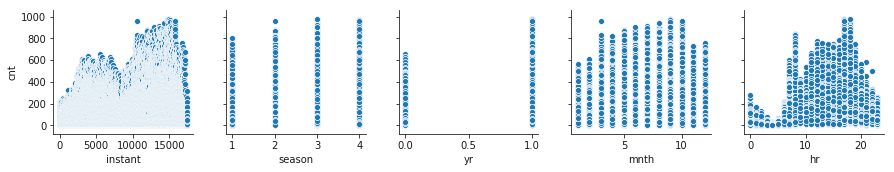

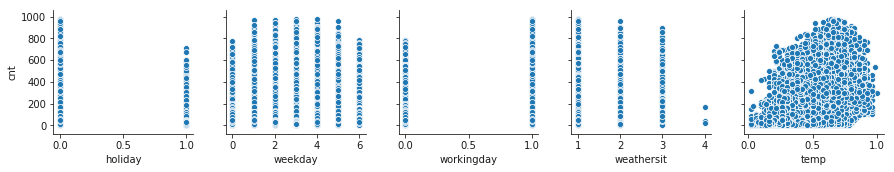

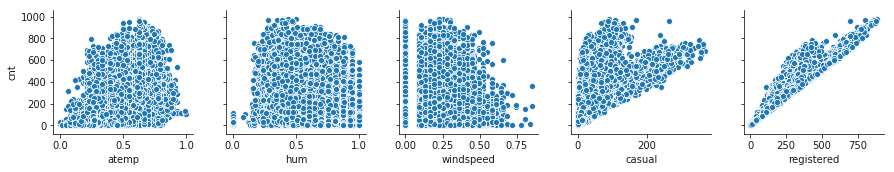

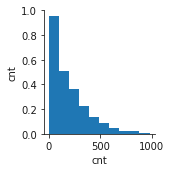

In [76]:
#correlation plot w.r.t cnt
for i in range (0, len(hour_num.columns),5):
    sns.pairplot(hour_num, y_vars=['cnt'],x_vars=hour_num.columns[i:i+5])

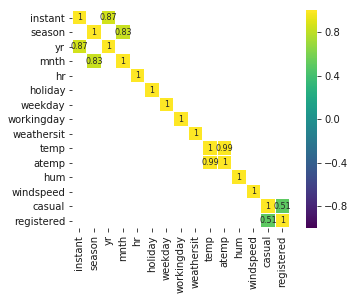

In [77]:
#plotting other attributes correlation on a heatmap
corr= hour_num.drop('cnt',axis=1).corr()
sns.heatmap(corr[(corr>=0.5)|(corr<=-0.4)],
cmap='viridis',vmax=1.0, vmin=-1.0,linewidth=0.1, 
            annot=True, annot_kws={'size':8},square=True
           )

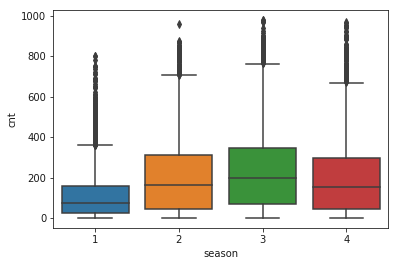

In [78]:
#box-plot, season & cnt
box1= sns.boxplot(x='season',y='cnt',data=hour)


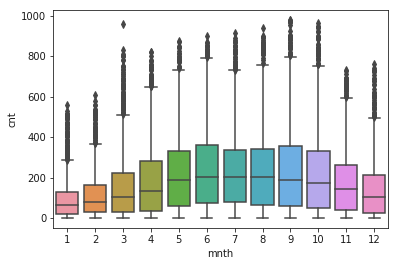

In [79]:
#box-plot,for the mnth & cnt,  
box2= sns.boxplot(x='mnth',y='cnt',data=hour)

create regression plot for the cnt, w.r.t. the most correlating features (temp,atemp,hr,hum) to find outliers 

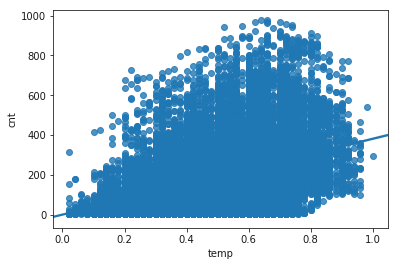

In [80]:
#regression plot, 
sns.regplot(hour_num['temp'],hour_num['cnt'])

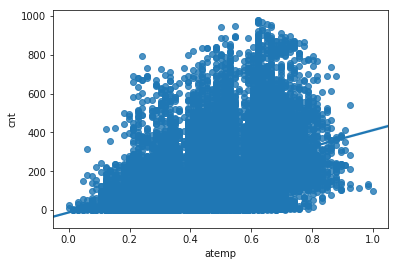

In [81]:
#regression plot, detect outliers
sns.regplot(hour_num['atemp'],hour_num['cnt'])

# Now we start by creating the model, in this case, we chose Multiple Linear Regression model from sklearn library to predict the cnt variable

In [82]:
#import necassary libraries, sklearn & numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [83]:
X= hour.drop(['cnt','instant','casual','registered','windspeed','workingday','weekday','holiday','dteday'],axis=1)
y= hour['cnt']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=9)


In [85]:
lin_reg_mod = LinearRegression()

In [86]:
lin_reg_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
pred = lin_reg_mod.predict(X_test)

In [88]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

In [89]:
print(test_set_rmse)
print(test_set_r2)

139.04084724191597
0.391314020277869


In [90]:
#calculate the mean absolute deviation
def mad(hour):
    cnt=hour['cnt']
    s=0
    c=0
    for i in cnt:
        c+=1
    for j in cnt:
        s+=j
    mean = float(s/c)  
    dvmean = abs(hour['cnt']-mean)
    S = 0
    for i in dvmean:
        S+=i
    mad = float(S/c)
    return mad 
mad(hour)



142.3063467403188

Try again with outlier removal, to try enhancing scores

In [91]:
#calculate the zscore, for outlier detection
from scipy import stats
import numpy as np
hour_o= hour.drop(['dteday','holiday','weekday','workingday','windspeed'],axis=1)
z = np.abs(stats.zscore(hour_o))
print(z)

[[1.73195115 1.3566343  1.0051343  ... 0.66275506 0.93018925 0.95633924]
 [1.73175182 1.3566343  1.0051343  ... 0.56134262 0.80465484 0.82402209]
 [1.73155249 1.3566343  1.0051343  ... 0.62219008 0.83769021 0.8681278 ]
 ...
 [1.73155249 1.3566343  0.99489192 ... 0.58162511 0.46769408 0.54836135]
 [1.73175182 1.3566343  0.99489192 ... 0.45993017 0.69894166 0.70824458]
 [1.73195115 1.3566343  0.99489192 ... 0.48021266 0.77161947 0.77440315]]


In [92]:
#remove outliers, thereshold of zscore < 3 
hour_o = hour_o[(z < 3).all(axis=1)]
X_o = X[(z < 3).all(axis=1)]
y_o= hour_o['cnt']

17379 was the original size, 270 records where removed

In [93]:
X_o.shape

(16516, 8)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_o, y_o, test_size = 0.4, random_state=9)


In [95]:
lin_reg_mod = LinearRegression()

In [96]:
lin_reg_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
pred = lin_reg_mod.predict(X_test)

In [98]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

In [99]:
#scores are worse, so we stick to the first

In [101]:
print(test_set_rmse)
print(test_set_r2)

117.08456518613728
0.3707829134826659
